In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/ching/Marketing_Research_Statistics/Customer_Segmentation_ex_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             1440 non-null   int64 
 1   Gender                 1440 non-null   object
 2   Age                    1440 non-null   int64 
 3   Annual_Income(k$)      1440 non-null   int64 
 4   Spending_Score(1-100)  1440 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 56.4+ KB


In [3]:
# rename the header 
df.rename(columns= {'Genre': 'Gender'}, inplace=True)

In [4]:
# total records in the dataset, # of columns
df.shape

(1440, 5)

In [5]:
# descriptive stats overview
df.describe()  

,CustomerID,Age,Annual_Income(k$),Spending_Score(1-100)
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,720.500000,37.100000,37.300000,56.350000
std,415.836506,11.352511,18.516158,23.304606
min,1.000000,19.000000,15.000000,20.000000
25%,360.750000,23.750000,20.000000,44.750000
50%,720.500000,38.500000,35.000000,55.000000
75%,1080.250000,47.250000,58.000000,80.250000
max,1440.000000,52.000000,70.000000,92.000000


In [6]:
# check datatypes
df.dtypes 

CustomerID                int64
Gender                   object
Age                       int64
Annual_Income(k$)         int64
Spending_Score(1-100)     int64
dtype: object

In [7]:
# check if nulls exist

df.isnull().sum()

CustomerID               0
Gender                   0
Age                      0
Annual_Income(k$)        0
Spending_Score(1-100)    0
dtype: int64

In [8]:
# drop the CustomerID column because we don't need to analyze it
df.drop(["CustomerID"], axis=1,inplace=True)
df.head()

,Gender,Age,Annual_Income(k$),Spending_Score(1-100)
0,Male,19,15,50
1,Male,20,15,50
2,Male,21,15,50
3,Male,22,15,60
4,Male,23,20,60


C:\Users\ching\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ching\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ching\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

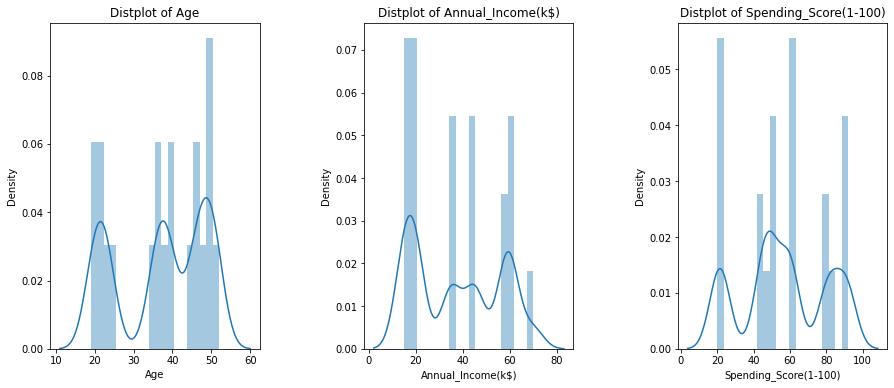

In [9]:
#---------------------Data Exploration & Viz-----------------
# subplot : to draw multiple plots in one figure
# draw numerical vairables plots 
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'Annual_Income(k$)', 'Spending_Score(1-100)']:
    n +=1 
    plt.subplot(1, 3, n) # how to show the figures (side-by-side: 1 row, 3 columns)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()


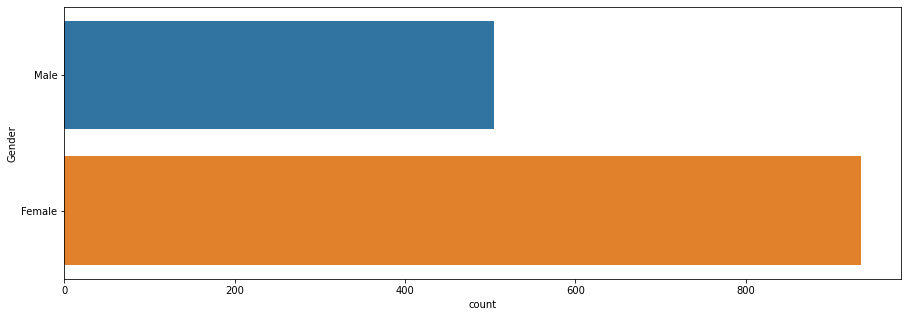

In [10]:
# draw categorical variable plot
plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data=df)
plt.show()

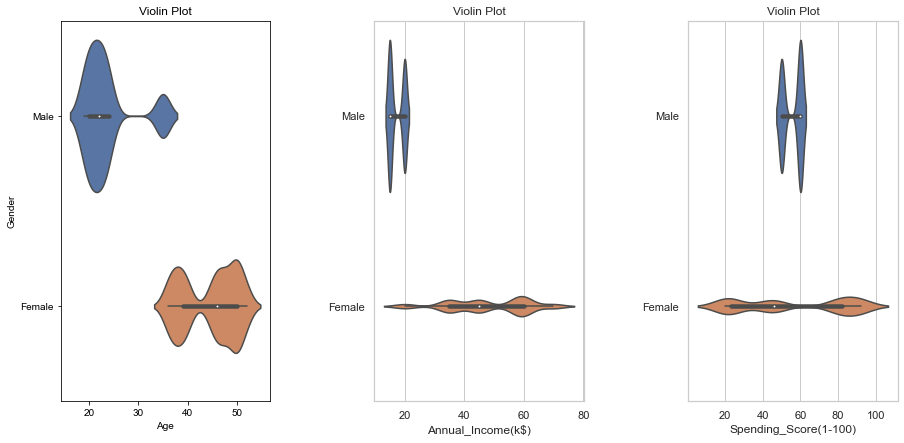

In [11]:
# Violinplot - To see figures (numerical variables vs. Categorical variables)
plt.figure(1, figsize=(15,7))
n=0
for cols in ['Age', 'Annual_Income(k$)', 'Spending_Score(1-100)']:
    n +=1 
    plt.subplot(1, 3, n) # how to show the figures (side-by-side: 1 row, 3 columns)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x = cols, y='Gender', data= df)
    plt.ylabel('Gender' if n == 1 else '' )
    plt.title('Violin Plot')
plt.show()

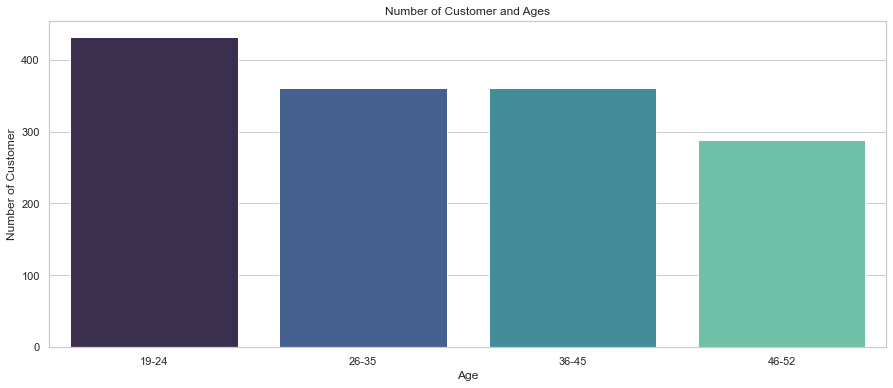

In [12]:
# draw a barchart for age & counts

age_19_24 = df.Age[(df.Age >=19) & (df.Age <= 24)]
age_25_39 = df.Age[(df.Age >=25) & (df.Age <= 39)]
age_40_48 = df.Age[(df.Age >=40) & (df.Age <= 48)]
age_49_52 = df.Age[(df.Age >=49) & (df.Age <= 52)]

agex = ["19-24", "26-35", "36-45", "46-52"]
agey = [len(age_19_24.values), len(age_25_39.values), len(age_40_48.values), len(age_49_52)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


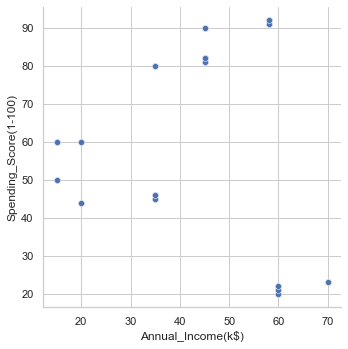

In [13]:
# draw a scatter plot (AnnalIncome vs Spending_Score
# to see the relationship in between
sns.relplot(x = "Annual_Income(k$)", y="Spending_Score(1-100)", data=df)

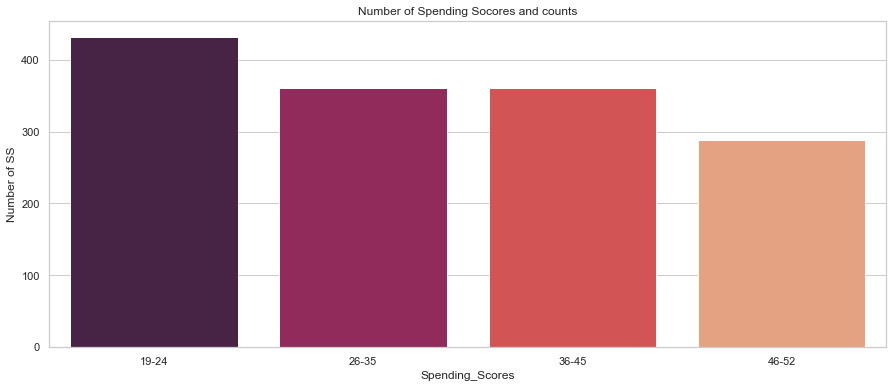

In [14]:
#  draw a barchart for spending_scores & counts

ss_20_45 = df["Spending_Score(1-100)"][(df["Spending_Score(1-100)"] >=19) & (df["Spending_Score(1-100)"] <= 24)]
ss_46_55 = df["Spending_Score(1-100)"][(df["Spending_Score(1-100)"] >=46) & (df["Spending_Score(1-100)"] <= 55)]
ss_56_81 = df["Spending_Score(1-100)"][(df["Spending_Score(1-100)"] >=56) & (df["Spending_Score(1-100)"] <= 81)]
ss_82_92 = df["Spending_Score(1-100)"][(df["Spending_Score(1-100)"] >=82) & (df["Spending_Score(1-100)"] <= 92)]


ssx = ["20-45", "46-55", "56-81", "82-92"]
ssy = [len(ss_20_45.values), len(ss_46_55.values), len(ss_56_81.values), len(ss_82_92.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="rocket")
plt.title("Number of Spending Socores and counts")
plt.xlabel("Spending_Scores")
plt.ylabel("Number of SS")
plt.show()

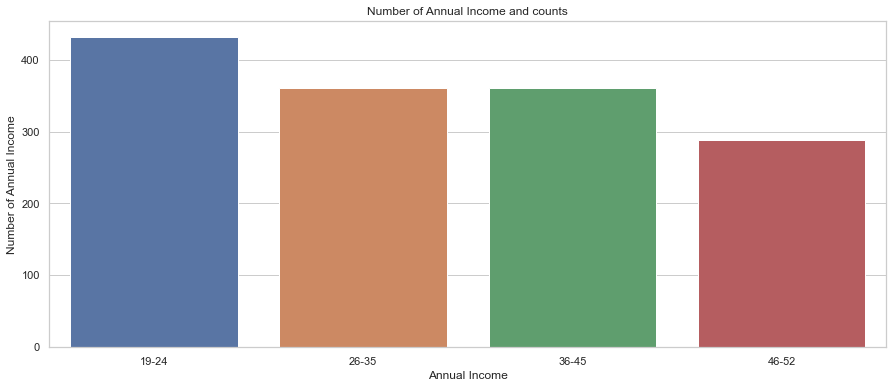

In [15]:
# draw a barchart for spending_scores & counts

ai_15_20 = df["Annual_Income(k$)"][(df["Annual_Income(k$)"] >=15) & (df["Annual_Income(k$)"] <= 20)]
ai_21_35 = df["Annual_Income(k$)"][(df["Annual_Income(k$)"] >=21) & (df["Annual_Income(k$)"] <= 35)]
ai_36_58 = df["Annual_Income(k$)"][(df["Annual_Income(k$)"] >=36) & (df["Annual_Income(k$)"] <= 58)]
ai_59_70 = df["Annual_Income(k$)"][(df["Annual_Income(k$)"] >=59) & (df["Annual_Income(k$)"] <= 70)]


ssx = ["15-20", "21-35", "36-58", "59-70"]
ssy = [len(ai_15_20.values), len(ai_21_35.values), len(ai_36_58.values), len(ai_59_70.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey)
plt.title("Number of Annual Income and counts")
plt.xlabel("Annual Income")
plt.ylabel("Number of Annual Income")
plt.show()

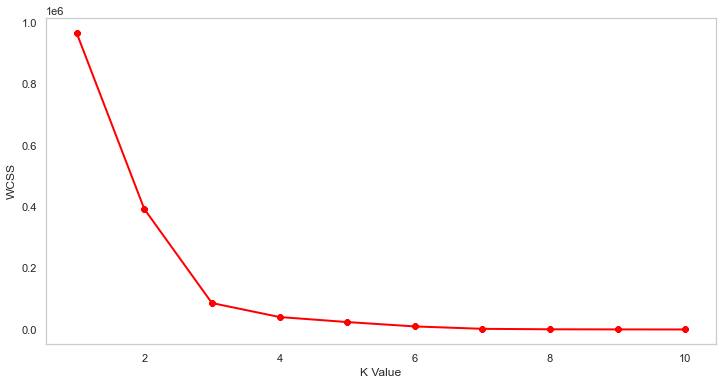

In [16]:
# -------------------Cluster Analysis -----------------------
# pip install scikit-learn
# to define the optimal # of clusters based on Age, Spending_Scores by using Sum of Squared methods

X1 = df.loc[:, ["Age", "Spending_Score(1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [17]:
# use Kmeans to decide the optimal # of cluster
# all respondents are categorized by 0-3 (4 in total)

kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

[2 2 2 ... 0 0 0]


In [18]:
# see the centroid of each cluster  x , y
# x = Age, y = Spending_Scores
print(kmeans.cluster_centers_)

[[50.5        21.5       ]
 [44.16666667 86.        ]
 [21.5        55.        ]
 [36.5        48.75      ]]


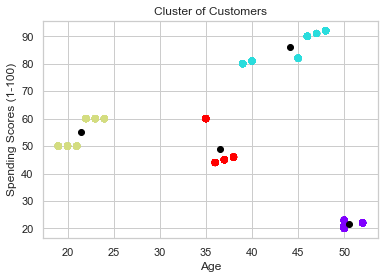

In [19]:
# draw a scatter plot (Age & Spending Scores)
# black dots = centriods of each cluster

plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Scores (1-100)')
plt.show()

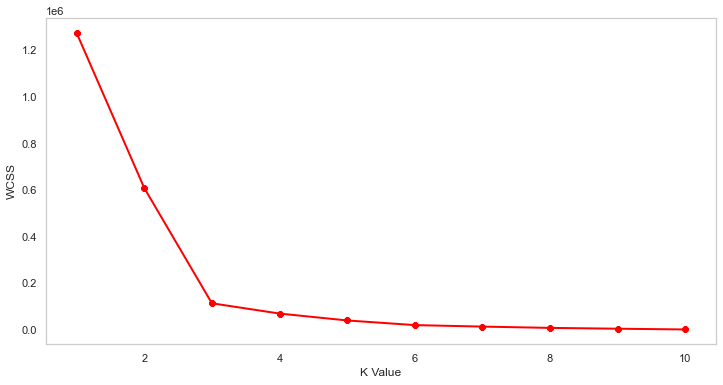

In [20]:
#-------------Cluster Analysis Part 2 --------------------
X2 = df.loc[:, ["Annual_Income(k$)", "Spending_Score(1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [21]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X2)
print(label)

[2 2 2 ... 1 1 1]


In [22]:
print(kmeans.cluster_centers_)

[[47.66666667 86.        ]
 [62.5        21.5       ]
 [17.5        54.25      ]
 [35.         45.5       ]]


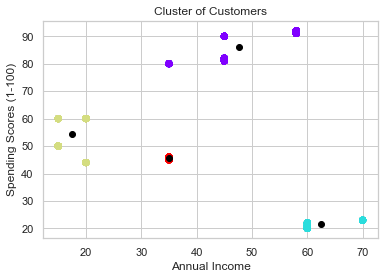

In [23]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Scores (1-100)')
plt.show()

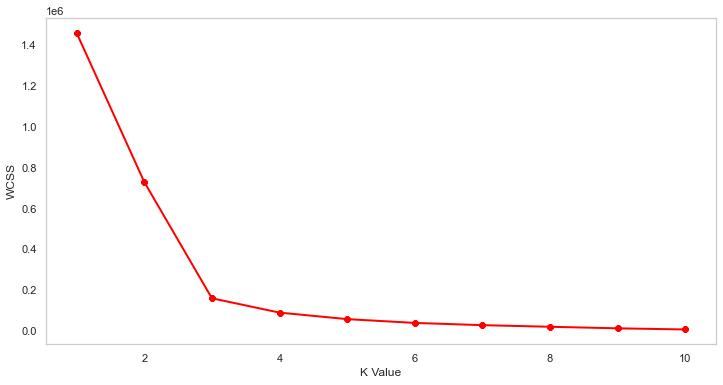

In [24]:
# -------------Cluster Analysis Part 3  all numerical variables-------------
X3 = df.iloc[:,1:]

wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [25]:
# Identify the # of clusters
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X3)
print(label)

[0 0 0 ... 1 1 1]


In [26]:
# get centroids : x , y, z
print(kmeans.cluster_centers_)

[[23.42857143 17.14285714 55.71428571]
 [50.5        62.5        21.5       ]
 [44.16666667 47.66666667 86.        ]
 [37.         30.         45.        ]]


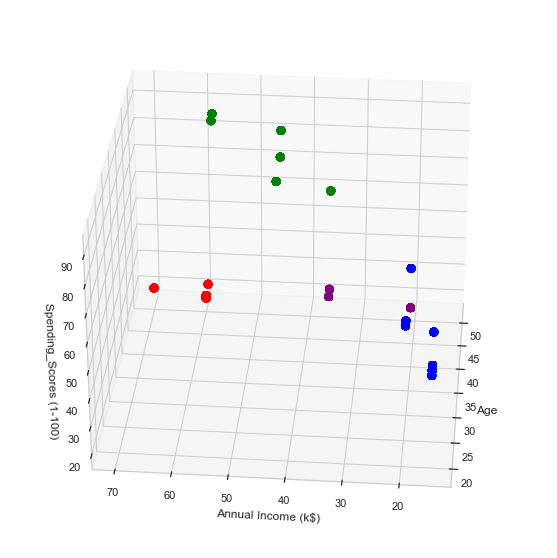

In [31]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.label == 0], df["Annual_Income(k$)"][df.label == 0], df["Spending_Score(1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual_Income(k$)"][df.label == 1], df["Spending_Score(1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual_Income(k$)"][df.label == 2], df["Spending_Score(1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual_Income(k$)"][df.label == 3], df["Spending_Score(1-100)"][df.label == 3], c='purple', s=60)
ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending_Scores (1-100)")

plt.show()